## **Importing Libraries**

In [ ]:
# Importing required Libraries

import tweepy
import csv
import string
import pandas as pd
import matplotlib.pyplot as plt

# Twitter credentials

consumerKey = "AcP8KYr7nSt11kovpQIRwgvns"
consumerSecret = "ns5mYbxhu9fy4HZtlo3nnG1kOakVgfzeZ9YZiQRplj7NDutIgi"
accessToken = "1335224178882965504-BC262WYWn2zPddCKR5MPo4zJPuSZ0T"
accessTokenSecret = "r2xVpbW8YLxQ1YagFFMbU9rOyRKy9X2e69edxx55LqHam"

# authentication

authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

# extraxt tweets

name = input("Enter the user handle: ")
posts = api.user_timeline(screen_name= name, count = 90, lang ="en", tweet_mode="extended")


# File creation

with open("user_tweets.csv", 'w', newline='',encoding="utf-8") as post:
  writer = csv.writer(post)
  writer.writerow(['sno.','id', 'tweet'])
  j=0
  for i in posts :
      j += 1
      writer.writerow([j, i.id, i.full_text] )

#Dataframe created

full_df = pd.read_csv("/content/user_tweets.csv")
full_df.head()

Enter the user handle: elonmusk


,sno.,id,tweet
0,1,1648550090330480640,@RGVaerialphotos The team is working around th...
1,2,1648549367974973440,@alx Spend it wisely 🫡
2,3,1648548827979304960,@TrungTPhan I’m not surprised. Taylor is smart...
3,4,1648541412810534912,@stevenmarkryan Seriously (sigh)
4,5,1648525109882417152,RT @SpaceX: Boats of all sizes can now get hig...


## **NLP Operation**

In [ ]:
#string conversion

df = full_df[["tweet"]]
df2 = df.copy()
df2["tweet"] = df["tweet"].astype(str)
df2.head()

,tweet
0,@RGVaerialphotos The team is working around th...
1,@alx Spend it wisely 🫡
2,@TrungTPhan I’m not surprised. Taylor is smart...
3,@stevenmarkryan Seriously (sigh)
4,RT @SpaceX: Boats of all sizes can now get hig...


In [ ]:
#Removal of HTML tags

final_df = df2.copy()
df3 = df2.copy()
from bs4 import BeautifulSoup
def remove_html(text):
    return BeautifulSoup(text, "lxml").text
df3['tweet'] = df2['tweet'].apply(lambda text : remove_html(text))
#df3.head()
#Removal of HTML tags
df = df3.copy()
from bs4 import BeautifulSoup
def remove_html(text):
    return BeautifulSoup(text, "lxml").text
df['tweet'] = df3['tweet'].apply(lambda text : remove_html(text))
df.head()

<ipython-input-3-b36d58ac3b25>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text
<ipython-input-3-b36d58ac3b25>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


,tweet
0,@RGVaerialphotos The team is working around th...
1,@alx Spend it wisely 🫡
2,@TrungTPhan I’m not surprised. Taylor is smart...
3,@stevenmarkryan Seriously (sigh)
4,RT @SpaceX: Boats of all sizes can now get hig...


In [ ]:
#Removal of URL’s

df3 = df.copy()
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
#Passing the function to 'text_rare'
df3['tweet'] = df['tweet'].apply(lambda text :remove_urls(text))
df3.head()

,tweet
0,@RGVaerialphotos The team is working around th...
1,@alx Spend it wisely 🫡
2,@TrungTPhan I’m not surprised. Taylor is smart...
3,@stevenmarkryan Seriously (sigh)
4,RT @SpaceX: Boats of all sizes can now get hig...


In [ ]:
#Replace emoji to text

import emoji
df2 = df3.copy()
df2['tweet'] = df3['tweet'].apply(lambda text: emoji.demojize(text))
df2.head()

,tweet,tweet_lower,text_wo_punct,text_wo_stop
0,@RGVaerialphotos The team is working around th...,@rgvaerialphotos the team is working around th...,rgvaerialphotos the team is working around the...,rgvaerialphotos team working around clock many...
1,@alx Spend it wisely :saluting_face:,@alx spend it wisely :saluting_face:,alx spend it wisely salutingface,alx spend wisely salutingface
2,@TrungTPhan I’m not surprised. Taylor is smart...,@trungtphan i’m not surprised. taylor is smart...,trungtphan i’m not surprised taylor is smart a...,trungtphan i’m surprised taylor smart father w...
3,@stevenmarkryan Seriously (sigh),@stevenmarkryan seriously (sigh),stevenmarkryan seriously sigh,stevenmarkryan seriously sigh
4,RT @SpaceX: Boats of all sizes can now get hig...,rt @spacex: boats of all sizes can now get hig...,rt spacex boats of all sizes can now get highs...,rt spacex boats sizes get highspeed connectivi...


In [ ]:
#lower case

df = df2.copy()
df["tweet_lower"] = df2["tweet"].str.lower()
df.head()

,tweet,tweet_lower
0,@RGVaerialphotos The team is working around th...,@rgvaerialphotos the team is working around th...
1,@alx Spend it wisely :saluting_face:,@alx spend it wisely :saluting_face:
2,@TrungTPhan I’m not surprised. Taylor is smart...,@trungtphan i’m not surprised. taylor is smart...
3,@stevenmarkryan Seriously (sigh),@stevenmarkryan seriously (sigh)
4,RT @SpaceX: Boats of all sizes can now get hig...,rt @spacex: boats of all sizes can now get hig...


In [ ]:
#removing Removal of Punctuations

df2 = df.copy()
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df2["text_wo_punct"] = df["tweet_lower"].apply(lambda text: remove_punctuation(text))
df2.head()

,tweet,tweet_lower,text_wo_punct
0,@RGVaerialphotos The team is working around th...,@rgvaerialphotos the team is working around th...,rgvaerialphotos the team is working around the...
1,@alx Spend it wisely :saluting_face:,@alx spend it wisely :saluting_face:,alx spend it wisely salutingface
2,@TrungTPhan I’m not surprised. Taylor is smart...,@trungtphan i’m not surprised. taylor is smart...,trungtphan i’m not surprised taylor is smart a...
3,@stevenmarkryan Seriously (sigh),@stevenmarkryan seriously (sigh),stevenmarkryan seriously sigh
4,RT @SpaceX: Boats of all sizes can now get hig...,rt @spacex: boats of all sizes can now get hig...,rt spacex boats of all sizes can now get highs...


In [ ]:
#Removal of stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

df3 = df2.copy()
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df3["text_wo_stop"] = df2["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df3.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet,tweet_lower,text_wo_punct,text_wo_stop
0,@RGVaerialphotos The team is working around th...,@rgvaerialphotos the team is working around th...,rgvaerialphotos the team is working around the...,rgvaerialphotos team working around clock many...
1,@alx Spend it wisely :saluting_face:,@alx spend it wisely :saluting_face:,alx spend it wisely salutingface,alx spend wisely salutingface
2,@TrungTPhan I’m not surprised. Taylor is smart...,@trungtphan i’m not surprised. taylor is smart...,trungtphan i’m not surprised taylor is smart a...,trungtphan i’m surprised taylor smart father w...
3,@stevenmarkryan Seriously (sigh),@stevenmarkryan seriously (sigh),stevenmarkryan seriously sigh,stevenmarkryan seriously sigh
4,RT @SpaceX: Boats of all sizes can now get hig...,rt @spacex: boats of all sizes can now get hig...,rt spacex boats of all sizes can now get highs...,rt spacex boats sizes get highspeed connectivi...


In [ ]:
#Stemming

df2 = df3.copy()
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df2["tweet_stemmed"] = df3["text_wo_stop"].apply(lambda text: stem_words(text))
df2.head()

,tweet,tweet_lower,text_wo_punct,text_wo_stop,tweet_stemmed
0,@RGVaerialphotos The team is working around th...,@rgvaerialphotos the team is working around th...,rgvaerialphotos the team is working around the...,rgvaerialphotos team working around clock many...,rgvaerialphoto team work around clock mani iss...
1,@alx Spend it wisely :saluting_face:,@alx spend it wisely :saluting_face:,alx spend it wisely salutingface,alx spend wisely salutingface,alx spend wise salutingfac
2,@TrungTPhan I’m not surprised. Taylor is smart...,@trungtphan i’m not surprised. taylor is smart...,trungtphan i’m not surprised taylor is smart a...,trungtphan i’m surprised taylor smart father w...,trungtphan i’m surpris taylor smart father wel...
3,@stevenmarkryan Seriously (sigh),@stevenmarkryan seriously (sigh),stevenmarkryan seriously sigh,stevenmarkryan seriously sigh,stevenmarkryan serious sigh
4,RT @SpaceX: Boats of all sizes can now get hig...,rt @spacex: boats of all sizes can now get hig...,rt spacex boats of all sizes can now get highs...,rt spacex boats sizes get highspeed connectivi...,rt spacex boat size get highspe connect water ...


In [ ]:
#Lemmatization
import nltk
nltk.download('wordnet')
df = df2.copy()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["tweet_lemmatized"] = df2["tweet_stemmed"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet,tweet_lower,text_wo_punct,text_wo_stop,tweet_stemmed,tweet_lemmatized
0,@RGVaerialphotos The team is working around th...,@rgvaerialphotos the team is working around th...,rgvaerialphotos the team is working around the...,rgvaerialphotos team working around clock many...,rgvaerialphoto team work around clock mani iss...,rgvaerialphoto team work around clock mani iss...
1,@alx Spend it wisely :saluting_face:,@alx spend it wisely :saluting_face:,alx spend it wisely salutingface,alx spend wisely salutingface,alx spend wise salutingfac,alx spend wise salutingfac
2,@TrungTPhan I’m not surprised. Taylor is smart...,@trungtphan i’m not surprised. taylor is smart...,trungtphan i’m not surprised taylor is smart a...,trungtphan i’m surprised taylor smart father w...,trungtphan i’m surpris taylor smart father wel...,trungtphan i’m surpris taylor smart father wel...
3,@stevenmarkryan Seriously (sigh),@stevenmarkryan seriously (sigh),stevenmarkryan seriously sigh,stevenmarkryan seriously sigh,stevenmarkryan serious sigh,stevenmarkryan serious sigh
4,RT @SpaceX: Boats of all sizes can now get hig...,rt @spacex: boats of all sizes can now get hig...,rt spacex boats of all sizes can now get highs...,rt spacex boats sizes get highspeed connectivi...,rt spacex boat size get highspe connect water ...,rt spacex boat size get highspe connect water ...


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
df2 = df.copy()
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
df2["Clean_tweet"] = df["tweet_lemmatized"].apply(lambda text: lemmatize_words(text))
df2.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,tweet,tweet_lower,text_wo_punct,text_wo_stop,tweet_stemmed,tweet_lemmatized,Clean_tweet
0,@RGVaerialphotos The team is working around th...,@rgvaerialphotos the team is working around th...,rgvaerialphotos the team is working around the...,rgvaerialphotos team working around clock many...,rgvaerialphoto team work around clock mani iss...,rgvaerialphoto team work around clock mani iss...,rgvaerialphoto team work around clock mani iss...
1,@alx Spend it wisely :saluting_face:,@alx spend it wisely :saluting_face:,alx spend it wisely salutingface,alx spend wisely salutingface,alx spend wise salutingfac,alx spend wise salutingfac,alx spend wise salutingfac
2,@TrungTPhan I’m not surprised. Taylor is smart...,@trungtphan i’m not surprised. taylor is smart...,trungtphan i’m not surprised taylor is smart a...,trungtphan i’m surprised taylor smart father w...,trungtphan i’m surpris taylor smart father wel...,trungtphan i’m surpris taylor smart father wel...,trungtphan i’m surpris taylor smart father wel...
3,@stevenmarkryan Seriously (sigh),@stevenmarkryan seriously (sigh),stevenmarkryan seriously sigh,stevenmarkryan seriously sigh,stevenmarkryan serious sigh,stevenmarkryan serious sigh,stevenmarkryan serious sigh
4,RT @SpaceX: Boats of all sizes can now get hig...,rt @spacex: boats of all sizes can now get hig...,rt spacex boats of all sizes can now get highs...,rt spacex boats sizes get highspeed connectivi...,rt spacex boat size get highspe connect water ...,rt spacex boat size get highspe connect water ...,rt spacex boat size get highspe connect water ...


In [ ]:
final_df["clean_tweet"] = df2["Clean_tweet"]
final_df.head()

,tweet,clean_tweet
0,@RGVaerialphotos The team is working around th...,rgvaerialphoto team work around clock mani iss...
1,@alx Spend it wisely 🫡,alx spend wise salutingfac
2,@TrungTPhan I’m not surprised. Taylor is smart...,trungtphan i’m surpris taylor smart father wel...
3,@stevenmarkryan Seriously (sigh),stevenmarkryan serious sigh
4,RT @SpaceX: Boats of all sizes can now get hig...,rt spacex boat size get highspe connect water ...


In [ ]:
import nltk
from nltk.tokenize import TweetTokenizer
df = final_df.copy()
tt = TweetTokenizer()
df["tweet_new"] = final_df["clean_tweet"].apply(tt.tokenize)
#df["Sentiment"] = full_df["tweet"]
df

,tweet,clean_tweet,tweet_new
0,@RGVaerialphotos The team is working around th...,rgvaerialphoto team work around clock mani iss...,"[rgvaerialphoto, team, work, around, clock, ma..."
1,@alx Spend it wisely 🫡,alx spend wise salutingfac,"[alx, spend, wise, salutingfac]"
2,@TrungTPhan I’m not surprised. Taylor is smart...,trungtphan i’m surpris taylor smart father wel...,"[trungtphan, i, ’, m, surpris, taylor, smart, ..."
3,@stevenmarkryan Seriously (sigh),stevenmarkryan serious sigh,"[stevenmarkryan, serious, sigh]"
4,RT @SpaceX: Boats of all sizes can now get hig...,rt spacex boat size get highspe connect water ...,"[rt, spacex, boat, size, get, highspe, connect..."
...,...,...,...
85,"@alifarhat79 You’re welcome, now if only you w...",alifarhat79 you’r welcom actual head fed,"[alifarhat, 79, you, ’, r, welcom, actual, hea..."
86,@alifarhat79 🤣🤣,alifarhat79 rollingonthefloorlaughingrollingon...,"[alifarhat, 79, rollingonthefloorlaughingrolli..."
87,Launch attempt tomorrow https://t.co/czFsQ53Xsa,launch attempt tomorrow,"[launch, attempt, tomorrow]"
88,@TRHLofficial Absolutely,trhloffici absolut,"[trhloffici, absolut]"


In [ ]:
# Tweets in CSV Flie

df.to_csv(r"./abc.csv",index=False)
df

,tweet,clean_tweet,tweet_new
0,@RGVaerialphotos The team is working around th...,rgvaerialphoto team work around clock mani iss...,"[rgvaerialphoto, team, work, around, clock, ma..."
1,@alx Spend it wisely 🫡,alx spend wise salutingfac,"[alx, spend, wise, salutingfac]"
2,@TrungTPhan I’m not surprised. Taylor is smart...,trungtphan i’m surpris taylor smart father wel...,"[trungtphan, i, ’, m, surpris, taylor, smart, ..."
3,@stevenmarkryan Seriously (sigh),stevenmarkryan serious sigh,"[stevenmarkryan, serious, sigh]"
4,RT @SpaceX: Boats of all sizes can now get hig...,rt spacex boat size get highspe connect water ...,"[rt, spacex, boat, size, get, highspe, connect..."
...,...,...,...
85,"@alifarhat79 You’re welcome, now if only you w...",alifarhat79 you’r welcom actual head fed,"[alifarhat, 79, you, ’, r, welcom, actual, hea..."
86,@alifarhat79 🤣🤣,alifarhat79 rollingonthefloorlaughingrollingon...,"[alifarhat, 79, rollingonthefloorlaughingrolli..."
87,Launch attempt tomorrow https://t.co/czFsQ53Xsa,launch attempt tomorrow,"[launch, attempt, tomorrow]"
88,@TRHLofficial Absolutely,trhloffici absolut,"[trhloffici, absolut]"


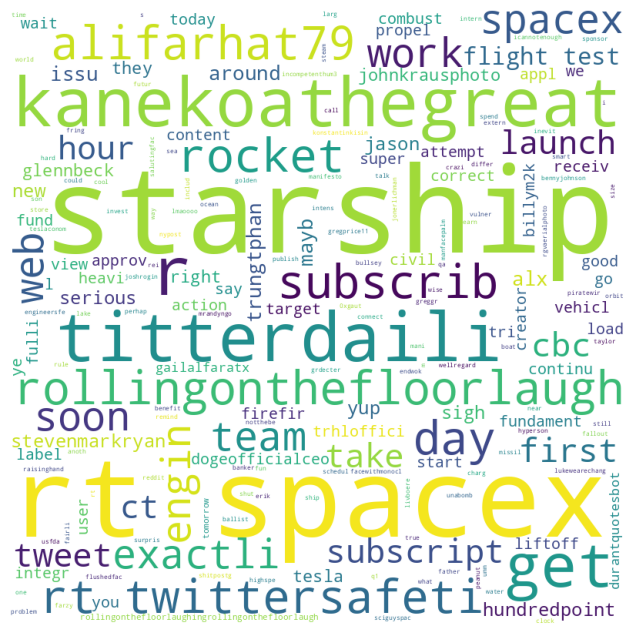

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# extract the column you want to visualize as a list
column_data = df['clean_tweet'].tolist()

# combine the list of strings into a single string
text = ' '.join(column_data)

# create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set()).generate(text)

# plot the WordCloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Model Building**

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import nltk
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train = pd.read_csv('/content/train.csv',encoding='iso-8859-1')
train = train[["ItemID","Sentiment","SentimentText"]]


In [ ]:
train = train.replace(to_replace = 2,value= 1)
train = train.replace(to_replace = 4,value= 1)

In [ ]:
train.shape

(99989, 3)

In [ ]:
train.head(20)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,1,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,1,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [ ]:
train['SentimentText'][400]

" 1 week before the palm pre comes out and my centro dies. I have a temp phone but my contacts aren't transfered yet. #sadpanda #fb"

In [ ]:
lens = train.SentimentText.str.len()
lens.mean(), lens.std(), lens.max()

(77.26430907399813, 36.38263943108252, 949)

In [ ]:
lens

0         61
1         51
2         37
3        132
4         53
        ... 
99984     78
99985    138
99986     30
99987     61
99988     31
Name: SentimentText, Length: 99989, dtype: int64

In [ ]:
x=lens>100
sum(x)

29653

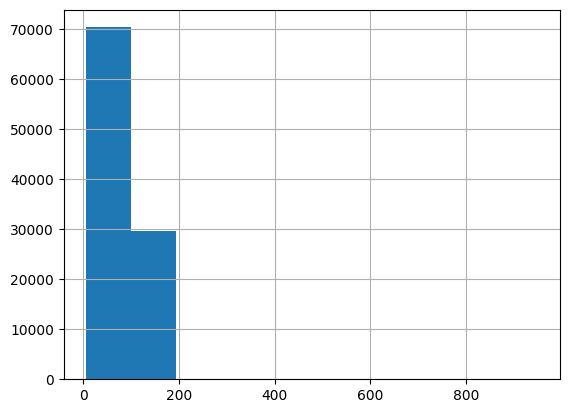

In [ ]:
lens.hist();
plt.show()

In [ ]:
train['Sentiment'].value_counts()[1]

56457

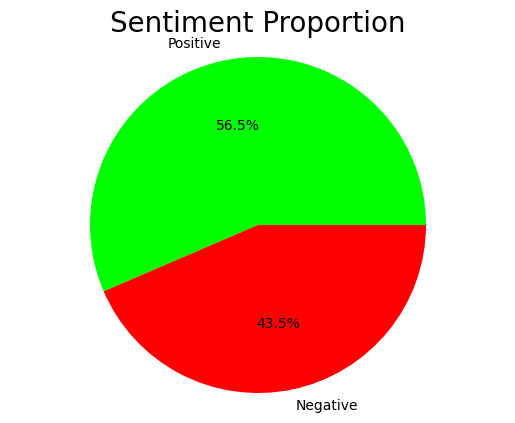

In [ ]:
labels = ["Positive", "Negative"]
colors = ['#00FF00','#FF0000']
sizes = [train['Sentiment'].value_counts()[1],
         train['Sentiment'].value_counts()[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,colors=colors, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Sentiment Proportion', fontsize=20)
plt.show()


In [ ]:
#Applying NlP operation on Train dataset

In [ ]:
#StopWords
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []

for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

print(wordsFiltered)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'All', 'work', 'play', 'makes', 'jack', 'dull', 'boy', '.']


In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#nltk.download("stopwords")

from nltk.corpus import stopwords
train.SentimentText = [w for w in train.SentimentText if w.lower() not in stopwords.words('english')]

In [ ]:
#Stemmer

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

words = ["game","gaming","gamed","games"]
stemmer = PorterStemmer()

for word in words:
    print(stemmer.stem(word))

game
game
game
game


In [ ]:
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
for word in plurals:
    print(stemmer.stem(word))

caress
fli
die
mule
deni
die
agre
own
humbl
size
meet
state
siez
item
sensat
tradit
refer
colon
plot


In [ ]:
#nltk.download("wordnet")

ps = nltk.PorterStemmer()
train.SentimentText = [ps.stem(l) for l in train.SentimentText]
train.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my apl frie...
1,1,0,i missed the new moon trail...
2,3,1,omg its already 7:30 :o
3,1,0,.. omgaga. im sooo im gunna cry. i'...
4,5,0,i think mi bf is cheating on me!!! ...


In [ ]:
#Split Test and Train

X = train.SentimentText
y = train.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [ ]:
train1=pd.concat([X_train,y_train], axis=1)
train1.shape

(79991, 2)

In [ ]:
#Tokenization

import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
from nltk import ngrams
sentence = 'this is a foo bar sentences and i want to ngramize it'
n = 2
bigrams = ngrams(sentence.split(), n)
for grams in bigrams:
  print (grams)


('this', 'is')
('is', 'a')
('a', 'foo')
('foo', 'bar')
('bar', 'sentences')
('sentences', 'and')
('and', 'i')
('i', 'want')
('want', 'to')
('to', 'ngramize')
('ngramize', 'it')


In [ ]:
#@title
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# extract the column you want to visualize as a list
column_data = train1['SentimentText'].tolist()

# combine the list of strings into a single string
text = ' '.join(column_data)

# create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set()).generate(text)

# plot the WordCloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Train vectorizer for code using wordToVec library**

In [ ]:
n = train1.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), #The lower and upper boundary of the range of n-values for different n-grams
                      tokenizer=tokenize,
                      min_df=3,      # ignore terms that have a df strictly lower than threshold
                      max_df=0.9,    #ignore terms that have a df strictly higher than threshold (corpus-specific stop words)
                      strip_accents='unicode', #Remove accents during the preprocessing step
                      use_idf=1,
                      smooth_idf=1,  #Smooth idf weights by adding one to document frequencies,
                                     #as if an extra document was seen containing every term in
                                     #the collection exactly once. Prevents zero divisions.
                      sublinear_tf=1, #Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).
                      max_features=40000
                     )
trn_term_doc = vec.fit_transform(train1['SentimentText'])
test_term_doc = vec.transform(X_test)
trn_term_doc, test_term_doc

/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(<79991x40000 sparse matrix of type '<class 'numpy.float64'>'
 	with 2023093 stored elements in Compressed Sparse Row format>,
 <19998x40000 sparse matrix of type '<class 'numpy.float64'>'
 	with 494592 stored elements in Compressed Sparse Row format>)

## **Naive Bayes classifier**

In [ ]:
#Here's the basic naive bayes feature equation:

def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [ ]:
# fits a logistic regression model   (on a sparse matrix x and a binary target variable y, where x is weighted by a log-ratio r calculated using Naive Bayes. )

def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=3,solver='newton-cg')   # Newton-Raphson algorithm with conjugate gradient updates to solve the optimization problem.
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r,x_nb

In [ ]:
x = trn_term_doc
test_x = test_term_doc

label_cols=['Sentiment']
preds = np.zeros((len(X_test), len(label_cols)))
preds


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
for i, j in enumerate(label_cols):
    print('fit', j)
    m,r,x_nb= get_mdl(train1[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit Sentiment


In [ ]:
y_pred=pd.DataFrame(preds.round(decimals=0), columns = label_cols)

In [ ]:
accuracy_score(y_test, y_pred)

0.7943294329432943

## **Using the Model**

In [ ]:
df = pd.read_csv("abc.csv")
tc = vec.transform(df["clean_tweet"])

In [ ]:
l_c= ["clean_tweet"]
preds2 = np.zeros((len(df["clean_tweet"]), len(l_c)))
preds2

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [ ]:
l_c=["clean_tweet"]
preds2[:,0] = m.predict_proba(tc.multiply(r))[:,0]
preds2

array([[0.42095602],
       [0.34406894],
       [0.30346111],
       [0.95626815],
       [0.33288213],
       [0.27530924],
       [0.30893701],
       [0.30893701],
       [0.27820413],
       [0.30893701],
       [0.30893701],
       [0.20390983],
       [0.30893701],
       [0.00270025],
       [0.42102081],
       [0.29700595],
       [0.26891295],
       [0.30893701],
       [0.52508995],
       [0.30893701],
       [0.30893701],
       [0.30815409],
       [0.36868141],
       [0.84255662],
       [0.38308095],
       [0.32329083],
       [0.33827945],
       [0.85398763],
       [0.30893701],
       [0.30893701],
       [0.98439186],
       [0.30893701],
       [0.30893701],
       [0.30893701],
       [0.40339613],
       [0.10848518],
       [0.36374498],
       [0.40393644],
       [0.19378542],
       [0.30893701],
       [0.33675029],
       [0.45328088],
       [0.30893701],
       [0.30893701],
       [0.13458843],
       [0.0995913 ],
       [0.66537865],
       [0.203

In [ ]:
#percentage1 = preds2.sum()["clean_tweet"]/len(preds2)*100
def getpercent():
    percentage = np.average(preds2)*100
    return percentage
getpercent()

35.255482186453584

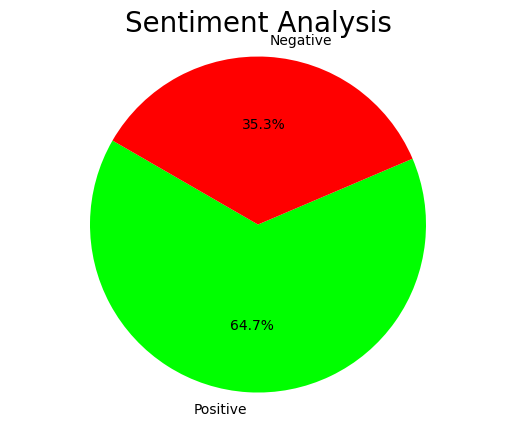

In [ ]:
import matplotlib.pyplot as plt
labels = ["Positive", "Negative"]
colors = ['#00FF00','#FF0000']
fig1, ax1 = plt.subplots()
x = getpercent()
y = 100-x
ax1.pie([y,x],colors=colors, labels=labels,startangle=150,autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Sentiment Analysis', fontsize=20)
plt.show()